<a href="https://colab.research.google.com/github/jingfang95/case_study/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from datetime import timedelta

2. Please count the number of tradelines per portfolioType per user.

In [ ]:
data = pd.read_excel('data_manipulation_for_interview_202109.xlsx', sheet_name='data')
data.head(5)

,id,credit_report_id,tradeline_index,user_id,portfolioType,creditLimit,highCredit,currentBalance,terms_in_month,scheduledMonthlyPayment,dateOpened,dateReported,dateClosed,mostRecentPayment_date,dataPulled
0,1,5dbb7b2af50df923e06c9973,0,5dbb7b29f50df923e06c9970,revolving,400.0,257.0,150.0,MIN,8.0,2019-07-17,2019-10-12,NaT,2019-09-03,2019-11-01 00:24:10.245
1,2,5dbb7b2af50df923e06c9973,1,5dbb7b29f50df923e06c9970,installment,NaN,38910.0,15656.0,75,672.0,2015-04-18,2019-09-30,NaT,2019-08-27,2019-11-01 00:24:10.245
2,3,5dbb7b2af50df923e06c9973,2,5dbb7b29f50df923e06c9970,installment,NaN,32636.0,32018.0,108,461.0,2019-05-09,2019-09-30,NaT,2019-09-24,2019-11-01 00:24:10.245
3,4,5dbb7b2af50df923e06c9973,3,5dbb7b29f50df923e06c9970,installment,NaN,40143.0,0.0,73,NaN,2014-06-21,2019-07-08,2019-07-08,2019-07-08,2019-11-01 00:24:10.245
4,5,5dbb7b2af50df923e06c9973,4,5dbb7b29f50df923e06c9970,installment,NaN,4000.0,0.0,36,NaN,2015-11-06,2017-10-07,2017-10-07,2017-10-07,2019-11-01 00:24:10.245


In [ ]:
portfolio_type = ['revolving', 'installment', 'mortgage', 'lineOfCredit', 'open']
user_dict = {}
for i in data['user_id'].unique():
  user_dict[i] = []
  for t in portfolio_type:
    try:
      n = len(data[data['user_id'] == i].groupby('portfolioType')['tradeline_index'].apply(set)[t])
      user_dict[i].append(n)
    except:
      user_dict[i].append(0)

In [ ]:
result = {'user':  user_dict.keys(),
        'revolving_cnt': [cnt[0] for cnt in list(user_dict.values())],
        'installment_cnt': [cnt[1] for cnt in list(user_dict.values())],
        'mortgage_cnt': [cnt[2] for cnt in list(user_dict.values())],
        'lineOfCredit_cnt': [cnt[3] for cnt in list(user_dict.values())],
        'open_cnt': [cnt[4] for cnt in list(user_dict.values())],
        }

result_df = pd.DataFrame(result, columns=['user', 'revolving_cnt', 'installment_cnt', 'mortgage_cnt', 'lineOfCredit_cnt', 'open_cnt'])
result_df.head()

,user,revolving_cnt,installment_cnt,mortgage_cnt,lineOfCredit_cnt,open_cnt
0,5dbb7b29f50df923e06c9970,1,31,0,0,0
1,5dbb7eb6f50df923e06c9977,28,18,6,2,0
2,5dbb85cbf50df923e06c997d,10,4,0,0,1
3,5dbbb2eef50df923e06c9984,4,6,0,0,1
4,5dbc3d6df50df923e06c998f,12,10,2,1,0


In [ ]:
result_df.to_excel('result.xlsx')

3. Please calculate the average utilization rate of the installment trades which opened within 90 days before the dataPulled time per user.

In [ ]:
time_limit = timedelta(days=90)
condition_1 = data['portfolioType'] == 'installment'
condition_2 = data['dataPulled'] - data['dateOpened'] <= time_limit
new_data = data[condition_1 & condition_2]
new_data.head(5)

,id,credit_report_id,tradeline_index,user_id,portfolioType,creditLimit,highCredit,currentBalance,terms_in_month,scheduledMonthlyPayment,dateOpened,dateReported,dateClosed,mostRecentPayment_date,dataPulled
163,164,5dbc46d5f50df923e06c99a6,11,5dbc46d4f50df923e06c99a3,installment,NaN,5000.0,5000.0,36,192.0,2019-09-19,2019-09-30,NaT,NaT,2019-11-01 14:53:09.377
329,330,5dbc676bf50df923e06c99e1,14,5dbc6769f50df923e06c99de,installment,NaN,1176.0,1452.0,12,121.0,2019-08-27,2019-09-30,NaT,NaT,2019-11-01 17:12:11.668
495,496,5dbc6e17f50df923e06c99f9,10,5dbc6e16f50df923e06c99f6,installment,NaN,2498.0,2557.0,36,113.0,2019-09-10,2019-09-30,NaT,NaT,2019-11-01 17:40:39.436
497,498,5dbc6e17f50df923e06c99f9,12,5dbc6e16f50df923e06c99f6,installment,NaN,1000.0,1000.0,6,181.0,2019-09-20,2019-09-30,NaT,NaT,2019-11-01 17:40:39.436
584,585,5dbc83a9f50df923e06c9a11,9,5dbc83a8f50df923e06c9a0e,installment,NaN,2593.0,2239.0,26,147.0,2019-09-17,2019-09-30,NaT,NaT,2019-11-01 19:12:41.575


The first business question I am interested to explore is whether customer's behavior of openning accounts for each portfolio type change along with seasons. 


*   For each account, convert opened date to its corresponding season
*   Group the accounts by their opened seasons and portfolio types
*   Count the number of accounts for each group and visualize it







In [ ]:
account_data = data[['id', 'portfolioType', 'dateOpened']].copy()
account_data = account_data[account_data['dateOpened'].notnull()]
account_data['seasonOpened'] = account_data['dateOpened'].apply(convert_date_to_season)
account_opened = account_data.groupby(['seasonOpened', 'portfolioType'])[['id']].count()
account_opened

id
seasonOpened portfolioType     
1964 Q4      revolving        1
1965 Q2      revolving        2
1965 Q4      revolving        1
1973 Q1      revolving        1
1974 Q3      open             1
...                         ...
2019 Q3      revolving      450
2019 Q4      installment     60
             lineOfCredit     1
             mortgage         2
             revolving      101

[508 rows x 1 columns]

In [ ]:
account_opened = account_opened.reset_index()
account_opened

,seasonOpened,portfolioType,id
0,1964 Q4,revolving,1
1,1965 Q2,revolving,2
2,1965 Q4,revolving,1
3,1973 Q1,revolving,1
4,1974 Q3,open,1
...,...,...,...
503,2019 Q3,revolving,450
504,2019 Q4,installment,60
505,2019 Q4,lineOfCredit,1
506,2019 Q4,mortgage,2


In [ ]:
def find_data(season):
  return int(season.split()[0]) >= 2010

In [ ]:
account_opened_2010 = account_opened[account_opened['seasonOpened'].apply(find_data)]
# account_opened_2010 = account_opened_2010[(account_opened_2010['portfolioType'] == 'open') | (account_opened_2010['portfolioType'] == 'lineOfCredit')]

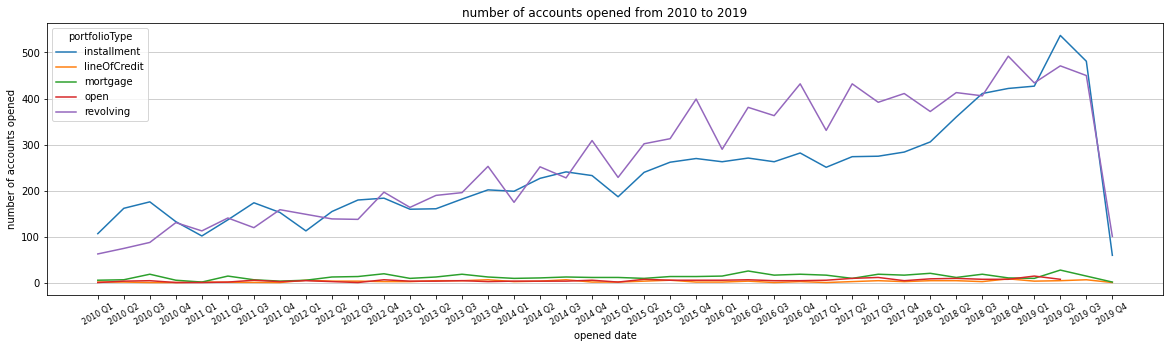

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,5))
plt.grid(axis='y', alpha=0.75)
sns.lineplot(x=account_opened_2010['seasonOpened'], y=account_opened_2010['id'], hue=account_opened_2010['portfolioType'], data=account_opened_2010)
plt.tick_params(axis='x', rotation=30)
plt.xticks(fontsize=8)
plt.xlabel('opened date')
plt.ylabel('number of accounts opened')
plt.title('number of accounts opened from 2010 to 2019')

plt.show()

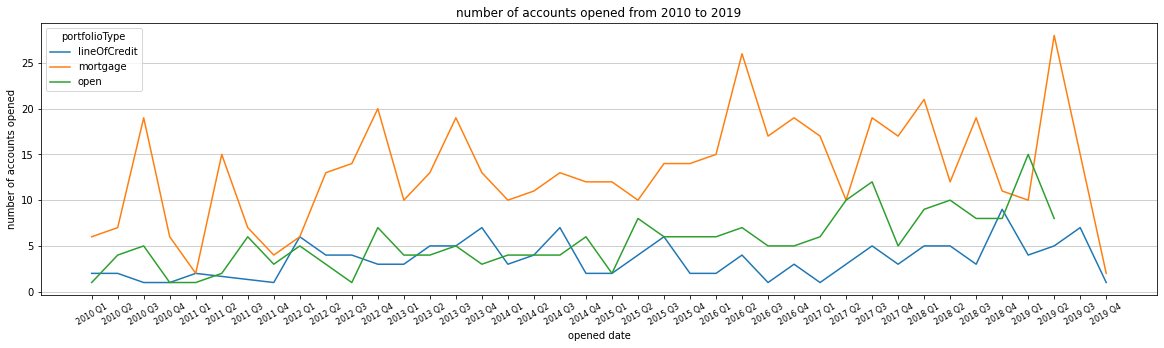

In [ ]:
account_opened_2010 = account_opened_2010[(account_opened_2010['portfolioType'] == 'mortgage') | (account_opened_2010['portfolioType'] == 'open') | (account_opened_2010['portfolioType'] == 'lineOfCredit')]


plt.figure(figsize=(20,5))
plt.grid(axis='y', alpha=0.75)
sns.lineplot(x=account_opened_2010['seasonOpened'], y=account_opened_2010['id'], hue=account_opened_2010['portfolioType'], data=account_opened_2010)
plt.tick_params(axis='x', rotation=30)
plt.xticks(fontsize=8)
plt.xlabel('opened date')
plt.ylabel('number of accounts opened')
plt.title('number of accounts opened from 2010 to 2019')

plt.show()


As shown in above charts:
*   The number of revolving accounts opened shows a noticeable drop in every first quarter starting from 2010. The number of installment accounts also shows a similar trend.
*   There is no clear cyclical pattern for the number of mortgage, open, and line of credit accounts opened during these time periods.  

Based on the results, some of the recommendations are as follows:
*   Some promotions could be applied like cash bonus for opening a new account in the first quarter, wihch may benefit the number of accounts opened.
*   Referral bonus could be used to motivate current users to refer their friends, which may also increase the number of accouts opened for different portfolio types. 

To further determine referral bonus, I am going to calculate the number of new users each year.


In [ ]:
user_data = data[['user_id', 'portfolioType', 'dateOpened']].copy()
user_data = user_data[user_data['dateOpened'].notnull()]

def convert_date_to_year(date):
  return f'{date.year}'

user_data['yearOpened'] = user_data['dateOpened'].apply(convert_date_to_year)


In [ ]:
new_user = user_data.groupby(['user_id'])[['yearOpened']].min()
new_user = new_user.reset_index()
new_user_opened = new_user.groupby(['yearOpened'])[['user_id']].count()
new_user_opened = new_user_opened.reset_index()
# new_user_opened = new_user_opened[new_user_opened['seasonOpened'].apply(find_data)]

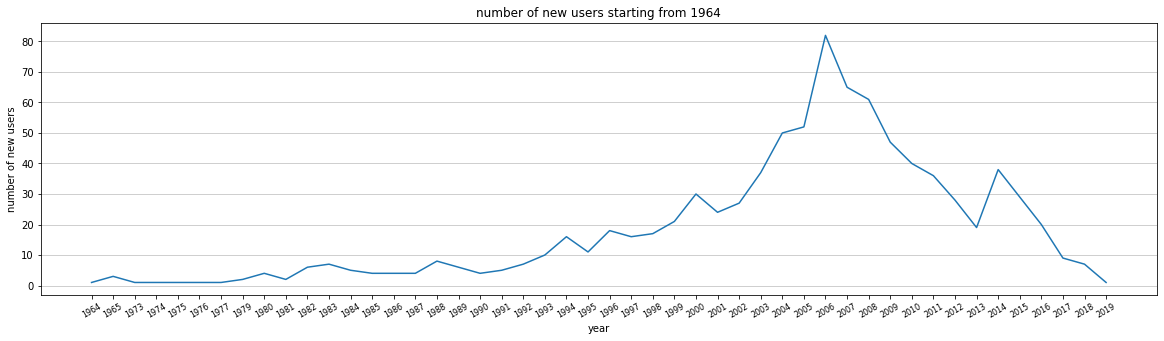

In [ ]:
plt.figure(figsize=(20,5))
plt.grid(axis='y', alpha=0.75)
sns.lineplot(x=new_user_opened['yearOpened'], y=new_user_opened['user_id'], data=new_user_opened)
plt.tick_params(axis='x', rotation=30)
plt.xticks(fontsize=8)
plt.xlabel('year')
plt.ylabel('number of new users')
plt.title('number of new users from 1964 to 2019')

plt.show()

There is a steady increase in the number of new users from 1964 to 2006, while a significant drop is observed starting from 2007, so we can say it may be beneficial to reward current users to refer potential new users, which may further increase the number of accounts opened.

The second business question I am interest to explore is whether customer's behavior of using revolving change along with seasons.

In [ ]:
revolving_data = data[data['portfolioType'] == 'revolving']
revolving_data.head(10)

,id,credit_report_id,tradeline_index,user_id,portfolioType,creditLimit,highCredit,currentBalance,terms_in_month,scheduledMonthlyPayment,dateOpened,dateReported,dateClosed,mostRecentPayment_date,dataPulled
0,1,5dbb7b2af50df923e06c9973,0,5dbb7b29f50df923e06c9970,revolving,400.0,257.0,150.0,MIN,8.0,2019-07-17,2019-10-12,NaT,2019-09-03,2019-11-01 00:24:10.245
32,33,5dbb7eb7f50df923e06c997a,0,5dbb7eb6f50df923e06c9977,revolving,4020.0,2416.0,2002.0,MIN,92.0,2013-05-16,2019-10-25,NaT,2019-10-22,2019-11-01 00:39:19.641
33,34,5dbb7eb7f50df923e06c997a,1,5dbb7eb6f50df923e06c9977,revolving,1800.0,1167.0,0.0,NaN,NaN,2009-05-16,2019-10-23,NaT,2015-10-05,2019-11-01 00:39:19.641
34,35,5dbb7eb7f50df923e06c997a,2,5dbb7eb6f50df923e06c9977,revolving,10000.0,8127.0,7013.0,NaN,NaN,2010-07-30,2019-10-23,NaT,2019-10-16,2019-11-01 00:39:19.641
35,36,5dbb7eb7f50df923e06c997a,3,5dbb7eb6f50df923e06c9977,revolving,1800.0,0.0,0.0,NaN,NaN,2018-08-12,2019-10-22,NaT,2018-08-12,2019-11-01 00:39:19.641
36,37,5dbb7eb7f50df923e06c997a,4,5dbb7eb6f50df923e06c9977,revolving,2000.0,2019.0,1953.0,MIN,40.0,2012-08-17,2019-10-17,NaT,2019-10-09,2019-11-01 00:39:19.641
37,38,5dbb7eb7f50df923e06c997a,5,5dbb7eb6f50df923e06c9977,revolving,1400.0,642.0,0.0,NaN,NaN,2018-03-20,2019-10-15,NaT,2019-03-23,2019-11-01 00:39:19.641
38,39,5dbb7eb7f50df923e06c997a,6,5dbb7eb6f50df923e06c9977,revolving,3500.0,1636.0,0.0,NaN,NaN,2008-11-02,2019-10-11,2019-03-05,2015-12-22,2019-11-01 00:39:19.641
39,40,5dbb7eb7f50df923e06c997a,7,5dbb7eb6f50df923e06c9977,revolving,1500.0,947.0,585.0,MIN,27.0,2007-10-08,2019-10-11,NaT,2019-09-13,2019-11-01 00:39:19.641
40,41,5dbb7eb7f50df923e06c997a,8,5dbb7eb6f50df923e06c9977,revolving,11800.0,8676.0,7791.0,MIN,171.0,2008-04-14,2019-10-11,NaT,2019-09-30,2019-11-01 00:39:19.641


In [ ]:
revolving_data['dateReported'].min()

Timestamp('2010-01-02 00:00:00')

In [ ]:
revolving_data['dateReported'].max()

Timestamp('2019-11-27 00:00:00')

In [ ]:
revolving_data[revolving_data['dateReported'] == '2010-01-02 00:00:00']

,id,credit_report_id,tradeline_index,user_id,portfolioType,creditLimit,highCredit,currentBalance,terms_in_month,scheduledMonthlyPayment,dateOpened,dateReported,dateClosed,mostRecentPayment_date,dataPulled
3887,3888,5dc1ec885658fc0b58b994bd,48,5dc1ec875658fc0b58b994ba,revolving,500.0,1276.0,0.0,NaN,NaN,2005-03-30,2010-01-02,2010-01-02,2010-01-02,2019-11-05 21:41:28.621


In [ ]:
revolving_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12517 entries, 0 to 24834
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       12517 non-null  int64         
 1   credit_report_id         12517 non-null  object        
 2   tradeline_index          12517 non-null  int64         
 3   user_id                  12517 non-null  object        
 4   portfolioType            12517 non-null  object        
 5   creditLimit              12443 non-null  float64       
 6   highCredit               12512 non-null  float64       
 7   currentBalance           12480 non-null  float64       
 8   terms_in_month           6141 non-null   object        
 9   scheduledMonthlyPayment  6141 non-null   float64       
 10  dateOpened               12516 non-null  datetime64[ns]
 11  dateReported             12517 non-null  datetime64[ns]
 12  dateClosed               5087 no

In [ ]:
revolving_data[revolving_data['creditLimit'].isnull()]

,id,credit_report_id,tradeline_index,user_id,portfolioType,creditLimit,highCredit,currentBalance,terms_in_month,scheduledMonthlyPayment,dateOpened,dateReported,dateClosed,mostRecentPayment_date,dataPulled
1846,1847,5dc06689bd7caa6ddf66d7e5,2,5dc06688bd7caa6ddf66d7e2,revolving,NaN,120.0,0.0,NaN,NaN,2015-09-17,2017-08-21,2016-03-14,2017-05-04,2019-11-04 17:57:29.731
2258,2259,5dc0a30abd7caa6ddf66d8c7,2,5dc0a309bd7caa6ddf66d8c4,revolving,NaN,56.0,56.0,NaN,NaN,2016-04-11,2016-12-12,2016-09-12,NaT,2019-11-04 22:15:38.721
3290,3291,5dc1cb34bd7caa6ddf66d9f3,3,5dc1cb33bd7caa6ddf66d9f0,revolving,NaN,203.0,200.0,NaN,NaN,2015-12-11,2016-12-12,2016-09-12,2016-01-31,2019-11-05 19:19:16.104
3292,3293,5dc1cb34bd7caa6ddf66d9f3,5,5dc1cb33bd7caa6ddf66d9f0,revolving,NaN,24.0,0.0,NaN,NaN,2016-03-11,2017-02-13,2016-09-12,2016-11-01,2019-11-05 19:19:16.104
3613,3614,5dc1e4295658fc0b58b9948a,0,5dc1e2215658fc0b58b99484,revolving,NaN,610.0,610.0,NaN,NaN,2015-12-11,2017-09-11,2017-06-12,NaT,2019-11-05 21:05:45.385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24348,24349,5de13b48e1c4624e16eb88ec,0,5de13b46e1c4624e16eb88e9,revolving,NaN,250.0,233.0,NaN,NaN,2013-02-15,2014-09-14,2014-06-15,2013-05-28,2019-11-29 15:37:44.128
24351,24352,5de13b48e1c4624e16eb88ec,3,5de13b46e1c4624e16eb88e9,revolving,NaN,369.0,369.0,NaN,NaN,2012-11-29,2013-12-15,2013-09-15,2013-03-26,2019-11-29 15:37:44.128
24352,24353,5de13b48e1c4624e16eb88ec,4,5de13b46e1c4624e16eb88e9,revolving,NaN,229.0,203.0,NaN,NaN,2013-02-18,2013-12-15,2013-09-15,2013-04-22,2019-11-29 15:37:44.128
24353,24354,5de13b48e1c4624e16eb88ec,5,5de13b46e1c4624e16eb88e9,revolving,NaN,276.0,276.0,NaN,NaN,2013-03-26,2013-10-13,2013-08-11,NaT,2019-11-29 15:37:44.128


In [ ]:
revolving_data[revolving_data['currentBalance'].isnull()]

,id,credit_report_id,tradeline_index,user_id,portfolioType,creditLimit,highCredit,currentBalance,terms_in_month,scheduledMonthlyPayment,dateOpened,dateReported,dateClosed,mostRecentPayment_date,dataPulled
1971,1972,5dc07137bd7caa6ddf66d816,5,5dc070fdbd7caa6ddf66d814,revolving,6700.0,7927.0,NaN,NaN,NaN,2008-07-01,2014-07-21,NaT,2014-07-08,2019-11-04 18:43:03.636
2968,2969,5dc1bb41bd7caa6ddf66d9be,27,5dc1bb0bbd7caa6ddf66d9bc,revolving,1000.0,1018.0,NaN,NaN,NaN,2007-06-15,2010-04-28,2010-04-25,2010-04-04,2019-11-05 18:11:13.532
3010,3011,5dc1be1cbd7caa6ddf66d9c8,41,5dc1be18bd7caa6ddf66d9c5,revolving,5000.0,5106.0,NaN,NaN,NaN,2011-06-07,2013-01-21,NaT,2013-01-13,2019-11-05 18:23:24.520
3011,3012,5dc1be1cbd7caa6ddf66d9c8,42,5dc1be18bd7caa6ddf66d9c5,revolving,7500.0,7577.0,NaN,NaN,NaN,2006-12-19,2013-01-20,NaT,2012-12-23,2019-11-05 18:23:24.520
5264,5265,5dc3532d5658fc0b58b99695,0,5dc3532c5658fc0b58b99692,revolving,400.0,1103.0,NaN,NaN,NaN,2004-04-01,2014-02-22,2010-10-27,2013-08-20,2019-11-06 23:11:41.360
5342,5343,5dc35c505658fc0b58b996aa,13,5dc35c505658fc0b58b996a7,revolving,300.0,75.0,NaN,NaN,NaN,2018-06-08,2018-06-27,NaT,NaT,2019-11-06 23:50:40.905
5624,5625,5dc44b065658fc0b58b9972d,11,5dc44b055658fc0b58b9972a,revolving,653.0,2016.0,NaN,NaN,NaN,2015-11-05,2018-02-28,NaT,2018-02-07,2019-11-07 16:49:10.223
7702,7703,5dc997365598c54ace44b709,43,5dc997345598c54ace44b706,revolving,2000.0,1398.0,NaN,NaN,NaN,2013-12-24,2016-03-22,NaT,2016-03-19,2019-11-11 17:15:34.531
8974,8975,5dcafd2f5598c54ace44b8bd,14,5dcafd2e5598c54ace44b8ba,revolving,15000.0,15099.0,NaN,NaN,NaN,2014-07-07,2017-04-21,NaT,2017-04-13,2019-11-12 18:42:55.323
9491,9492,5dcb67a25598c54ace44b99d,23,5dcb67a15598c54ace44b99a,revolving,1000.0,277.0,NaN,NaN,NaN,2011-04-30,2013-09-09,NaT,2013-01-31,2019-11-13 02:17:06.029


In [ ]:
revolving_data[revolving_data['dateOpened'].isnull()]

,id,credit_report_id,tradeline_index,user_id,portfolioType,creditLimit,highCredit,currentBalance,terms_in_month,scheduledMonthlyPayment,dateOpened,dateReported,dateClosed,mostRecentPayment_date,dataPulled
10378,10379,5dcd680599bd9c16373db238,25,5dcd680499bd9c16373db235,revolving,NaN,0.0,0.0,NaN,NaN,NaT,2011-05-19,2011-05-19,NaT,2019-11-14 14:43:17.631


In [ ]:
revolving_data[revolving_data['dateClosed'].isnull()]

,id,credit_report_id,tradeline_index,user_id,portfolioType,creditLimit,highCredit,currentBalance,terms_in_month,scheduledMonthlyPayment,dateOpened,dateReported,dateClosed,mostRecentPayment_date,dataPulled
0,1,5dbb7b2af50df923e06c9973,0,5dbb7b29f50df923e06c9970,revolving,400.0,257.0,150.0,MIN,8.0,2019-07-17,2019-10-12,NaT,2019-09-03,2019-11-01 00:24:10.245
32,33,5dbb7eb7f50df923e06c997a,0,5dbb7eb6f50df923e06c9977,revolving,4020.0,2416.0,2002.0,MIN,92.0,2013-05-16,2019-10-25,NaT,2019-10-22,2019-11-01 00:39:19.641
33,34,5dbb7eb7f50df923e06c997a,1,5dbb7eb6f50df923e06c9977,revolving,1800.0,1167.0,0.0,NaN,NaN,2009-05-16,2019-10-23,NaT,2015-10-05,2019-11-01 00:39:19.641
34,35,5dbb7eb7f50df923e06c997a,2,5dbb7eb6f50df923e06c9977,revolving,10000.0,8127.0,7013.0,NaN,NaN,2010-07-30,2019-10-23,NaT,2019-10-16,2019-11-01 00:39:19.641
35,36,5dbb7eb7f50df923e06c997a,3,5dbb7eb6f50df923e06c9977,revolving,1800.0,0.0,0.0,NaN,NaN,2018-08-12,2019-10-22,NaT,2018-08-12,2019-11-01 00:39:19.641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24813,24814,5de1a864e1c4624e16eb8985,7,5de1a863e1c4624e16eb8982,revolving,1500.0,1658.0,901.0,MIN,27.0,2011-09-21,2019-11-12,NaT,2019-11-08,2019-11-29 23:23:16.448
24814,24815,5de1a864e1c4624e16eb8985,8,5de1a863e1c4624e16eb8982,revolving,500.0,500.0,0.0,NaN,NaN,2019-07-26,2019-11-11,NaT,2019-08-30,2019-11-29 23:23:16.448
24815,24816,5de1a864e1c4624e16eb8985,9,5de1a863e1c4624e16eb8982,revolving,2000.0,2182.0,1691.0,MIN,54.0,2016-04-13,2019-11-08,NaT,2019-11-05,2019-11-29 23:23:16.448
24816,24817,5de1a864e1c4624e16eb8985,10,5de1a863e1c4624e16eb8982,revolving,2100.0,1325.0,918.0,MIN,30.0,2011-09-30,2019-11-06,NaT,2019-11-02,2019-11-29 23:23:16.448


In [ ]:
m1 = clean_revolving_data['currentBalance'] == 0
m2 = clean_revolving_data['dateReported'] - clean_revolving_data['mostRecentPayment_date'] > timedelta(days=90)
clean_revolving_data[(clean_revolving_data['dateClosed'].isnull()) & (m1 & m2)]

,id,credit_report_id,tradeline_index,user_id,portfolioType,creditLimit,highCredit,currentBalance,terms_in_month,scheduledMonthlyPayment,dateOpened,dateReported,dateClosed,mostRecentPayment_date,dataPulled
33,34,5dbb7eb7f50df923e06c997a,1,5dbb7eb6f50df923e06c9977,revolving,1800.0,1167.0,0.0,NaN,NaN,2009-05-16,2019-10-23,NaT,2015-10-05,2019-11-01 00:39:19.641
35,36,5dbb7eb7f50df923e06c997a,3,5dbb7eb6f50df923e06c9977,revolving,1800.0,0.0,0.0,NaN,NaN,2018-08-12,2019-10-22,NaT,2018-08-12,2019-11-01 00:39:19.641
37,38,5dbb7eb7f50df923e06c997a,5,5dbb7eb6f50df923e06c9977,revolving,1400.0,642.0,0.0,NaN,NaN,2018-03-20,2019-10-15,NaT,2019-03-23,2019-11-01 00:39:19.641
88,89,5dbb8611f50df923e06c997f,2,5dbb85cbf50df923e06c997d,revolving,10000.0,660.0,0.0,NaN,NaN,2015-10-26,2019-10-23,NaT,2019-06-14,2019-11-01 01:10:41.547
92,93,5dbb8611f50df923e06c997f,6,5dbb85cbf50df923e06c997d,revolving,10000.0,3650.0,0.0,NaN,NaN,2015-07-23,2019-10-14,NaT,2019-06-14,2019-11-01 01:10:41.547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24759,24760,5de18773e1c4624e16eb8966,5,5de18772e1c4624e16eb8963,revolving,1000.0,444.0,0.0,NaN,NaN,2016-09-10,2019-11-23,NaT,2018-04-16,2019-11-29 21:02:43.842
24763,24764,5de18773e1c4624e16eb8966,9,5de18772e1c4624e16eb8963,revolving,600.0,435.0,0.0,NaN,NaN,2018-03-24,2019-11-17,NaT,2018-11-11,2019-11-29 21:02:43.842
24771,24772,5de18773e1c4624e16eb8966,17,5de18772e1c4624e16eb8963,revolving,300.0,214.0,0.0,NaN,NaN,2016-06-12,2019-11-01,NaT,2019-01-25,2019-11-29 21:02:43.842
24787,24788,5de19303e1c4624e16eb897d,1,5de19302e1c4624e16eb897a,revolving,600.0,575.0,0.0,NaN,NaN,2017-10-22,2019-11-23,NaT,2019-06-24,2019-11-29 21:52:03.554


In [ ]:
mask = clean_revolving_data['currentBalance'] == 0
clean_revolving_data[(clean_revolving_data['dateClosed'].isnull()) & mask]

,id,credit_report_id,tradeline_index,user_id,portfolioType,creditLimit,highCredit,currentBalance,terms_in_month,scheduledMonthlyPayment,dateOpened,dateReported,dateClosed,mostRecentPayment_date,dataPulled
33,34,5dbb7eb7f50df923e06c997a,1,5dbb7eb6f50df923e06c9977,revolving,1800.0,1167.0,0.0,NaN,NaN,2009-05-16,2019-10-23,NaT,2015-10-05,2019-11-01 00:39:19.641
35,36,5dbb7eb7f50df923e06c997a,3,5dbb7eb6f50df923e06c9977,revolving,1800.0,0.0,0.0,NaN,NaN,2018-08-12,2019-10-22,NaT,2018-08-12,2019-11-01 00:39:19.641
37,38,5dbb7eb7f50df923e06c997a,5,5dbb7eb6f50df923e06c9977,revolving,1400.0,642.0,0.0,NaN,NaN,2018-03-20,2019-10-15,NaT,2019-03-23,2019-11-01 00:39:19.641
87,88,5dbb8611f50df923e06c997f,1,5dbb85cbf50df923e06c997d,revolving,1000.0,242.0,0.0,NaN,NaN,2019-07-20,2019-10-26,NaT,2019-08-09,2019-11-01 01:10:41.547
88,89,5dbb8611f50df923e06c997f,2,5dbb85cbf50df923e06c997d,revolving,10000.0,660.0,0.0,NaN,NaN,2015-10-26,2019-10-23,NaT,2019-06-14,2019-11-01 01:10:41.547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24771,24772,5de18773e1c4624e16eb8966,17,5de18772e1c4624e16eb8963,revolving,300.0,214.0,0.0,NaN,NaN,2016-06-12,2019-11-01,NaT,2019-01-25,2019-11-29 21:02:43.842
24787,24788,5de19303e1c4624e16eb897d,1,5de19302e1c4624e16eb897a,revolving,600.0,575.0,0.0,NaN,NaN,2017-10-22,2019-11-23,NaT,2019-06-24,2019-11-29 21:52:03.554
24791,24792,5de19303e1c4624e16eb897d,5,5de19302e1c4624e16eb897a,revolving,300.0,247.0,0.0,NaN,NaN,2018-11-23,2019-11-18,NaT,2019-06-24,2019-11-29 21:52:03.554
24811,24812,5de1a864e1c4624e16eb8985,5,5de1a863e1c4624e16eb8982,revolving,750.0,750.0,0.0,NaN,NaN,2015-08-26,2019-11-23,NaT,2019-08-30,2019-11-29 23:23:16.448


Handling missing value

In [ ]:
# time_limit = timedelta(days=365)
condition_1 = revolving_data['creditLimit'].notnull()
condition_2 = revolving_data['currentBalance'].notnull()
condition_3 = revolving_data['dateClosed'].isnull()

clean_revolving_data = revolving_data[condition_1 & condition_2 & condition_3]
# clean_revolving_data.head(10)
clean_revolving_data

,id,credit_report_id,tradeline_index,user_id,portfolioType,creditLimit,highCredit,currentBalance,terms_in_month,scheduledMonthlyPayment,dateOpened,dateReported,dateClosed,mostRecentPayment_date,dataPulled
0,1,5dbb7b2af50df923e06c9973,0,5dbb7b29f50df923e06c9970,revolving,400.0,257.0,150.0,MIN,8.0,2019-07-17,2019-10-12,NaT,2019-09-03,2019-11-01 00:24:10.245
32,33,5dbb7eb7f50df923e06c997a,0,5dbb7eb6f50df923e06c9977,revolving,4020.0,2416.0,2002.0,MIN,92.0,2013-05-16,2019-10-25,NaT,2019-10-22,2019-11-01 00:39:19.641
33,34,5dbb7eb7f50df923e06c997a,1,5dbb7eb6f50df923e06c9977,revolving,1800.0,1167.0,0.0,NaN,NaN,2009-05-16,2019-10-23,NaT,2015-10-05,2019-11-01 00:39:19.641
34,35,5dbb7eb7f50df923e06c997a,2,5dbb7eb6f50df923e06c9977,revolving,10000.0,8127.0,7013.0,NaN,NaN,2010-07-30,2019-10-23,NaT,2019-10-16,2019-11-01 00:39:19.641
35,36,5dbb7eb7f50df923e06c997a,3,5dbb7eb6f50df923e06c9977,revolving,1800.0,0.0,0.0,NaN,NaN,2018-08-12,2019-10-22,NaT,2018-08-12,2019-11-01 00:39:19.641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24813,24814,5de1a864e1c4624e16eb8985,7,5de1a863e1c4624e16eb8982,revolving,1500.0,1658.0,901.0,MIN,27.0,2011-09-21,2019-11-12,NaT,2019-11-08,2019-11-29 23:23:16.448
24814,24815,5de1a864e1c4624e16eb8985,8,5de1a863e1c4624e16eb8982,revolving,500.0,500.0,0.0,NaN,NaN,2019-07-26,2019-11-11,NaT,2019-08-30,2019-11-29 23:23:16.448
24815,24816,5de1a864e1c4624e16eb8985,9,5de1a863e1c4624e16eb8982,revolving,2000.0,2182.0,1691.0,MIN,54.0,2016-04-13,2019-11-08,NaT,2019-11-05,2019-11-29 23:23:16.448
24816,24817,5de1a864e1c4624e16eb8985,10,5de1a863e1c4624e16eb8982,revolving,2100.0,1325.0,918.0,MIN,30.0,2011-09-30,2019-11-06,NaT,2019-11-02,2019-11-29 23:23:16.448


In [ ]:
clean_revolving_data[['portfolioType', 'dateReported', 'dateClosed', 'creditLimit', 'currentBalance']].copy()

,portfolioType,dateReported,dateClosed,creditLimit,currentBalance
0,revolving,2019-10-12,NaT,400.0,150.0
32,revolving,2019-10-25,NaT,4020.0,2002.0
33,revolving,2019-10-23,NaT,1800.0,0.0
34,revolving,2019-10-23,NaT,10000.0,7013.0
35,revolving,2019-10-22,NaT,1800.0,0.0
...,...,...,...,...,...
24813,revolving,2019-11-12,NaT,1500.0,901.0
24814,revolving,2019-11-11,NaT,500.0,0.0
24815,revolving,2019-11-08,NaT,2000.0,1691.0
24816,revolving,2019-11-06,NaT,2100.0,918.0


In [ ]:
user_revolving = clean_revolving_data.groupby('user_id')['creditLimit', 'currentBalance'].sum()
user_revolving.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,creditLimit,currentBalance
user_id,,
5dbb7b29f50df923e06c9970,400.0,150.0
5dbb7eb6f50df923e06c9977,57720.0,37181.0
5dbb85cbf50df923e06c997d,82800.0,10679.0
5dbbb2eef50df923e06c9984,12000.0,8643.0
5dbc3d6df50df923e06c998f,4990.0,3591.0
5dbc401ff50df923e06c9999,23250.0,20140.0
5dbc46d4f50df923e06c99a3,29900.0,20343.0
5dbc4c56f50df923e06c99a9,20080.0,18779.0
5dbc58cff50df923e06c99b5,9350.0,6653.0


In [ ]:
user_revolving['utilization'] = user_revolving['currentBalance'] / user_revolving['creditLimit']
user_revolving.head(5)

,creditLimit,currentBalance,utilization
user_id,,,
5dbb7b29f50df923e06c9970,400.0,150.0,0.375000
5dbb7eb6f50df923e06c9977,57720.0,37181.0,0.644161
5dbb85cbf50df923e06c997d,82800.0,10679.0,0.128973
5dbbb2eef50df923e06c9984,12000.0,8643.0,0.720250
5dbc3d6df50df923e06c998f,4990.0,3591.0,0.719639


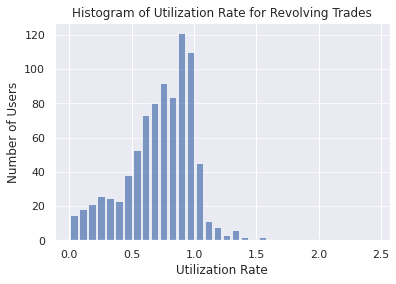

In [ ]:
import matplotlib.pyplot as plt

# "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=user_revolving['utilization'], bins='auto', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Utilization Rate')
plt.ylabel('Number of Users')
plt.title('Histogram of Utilization Rate for Revolving Trades')
plt.show()

# Set a clean upper y-axis limit
# plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

In [ ]:
user_revolving[user_revolving['utilization'] > 0.3]

,creditLimit,currentBalance,utilization
user_id,,,
5dbb7b29f50df923e06c9970,400.0,150.0,0.375000
5dbb7eb6f50df923e06c9977,57720.0,37181.0,0.644161
5dbbb2eef50df923e06c9984,12000.0,8643.0,0.720250
5dbc3d6df50df923e06c998f,4990.0,3591.0,0.719639
5dbc401ff50df923e06c9999,23250.0,20140.0,0.866237
...,...,...,...
5de183cde1c4624e16eb895c,39500.0,21531.0,0.545089
5de18772e1c4624e16eb8963,18050.0,13296.0,0.736620
5de18cd8e1c4624e16eb896a,1100.0,989.0,0.899091


In [ ]:
len(user_revolving[user_revolving['utilization'] > 0.3]) / len(user_revolving)

0.9010477299185099

In [ ]:
user_revolving[user_revolving['creditLimit'] < user_revolving['currentBalance']]

,creditLimit,currentBalance,utilization
user_id,,,
5dbc6769f50df923e06c99de,3400.0,3951.0,1.162059
5dbc86a8f50df923e06c9a15,29250.0,30751.0,1.051316
5dbca8d6bd7caa6ddf66d6c1,19700.0,19926.0,1.011472
5dbcbcd7bd7caa6ddf66d6eb,1100.0,1699.0,1.544545
5dc034abbd7caa6ddf66d77c,300.0,461.0,1.536667
...,...,...,...
5ddef62fe1c4624e16eb889e,6625.0,7975.0,1.203774
5ddf1569e1c4624e16eb88ca,600.0,645.0,1.075000
5de14fd5e1c4624e16eb8900,4600.0,4772.0,1.037391


In [ ]:
len(user_revolving[user_revolving['creditLimit'] < user_revolving['currentBalance']]) / len(user_revolving)

0.10593713620488941

In [ ]:
clean_revolving_data['dateReported'].min()

Timestamp('2010-04-25 00:00:00')

In [ ]:
clean_revolving_data['dateReported'].max()

Timestamp('2019-11-27 00:00:00')

In [ ]:
def convert_date_to_season(date):
  return f'{date.year} Q{(date.month + 2) // 3}'

# a = clean_revolving_data[clean_revolving_data['user_id'] == '5de17b8ce1c4624e16eb894c']['dateReported'][24701]
# convert_date_to_season(a)

In [ ]:
# inactive account
# mask_1 = revolving_data['currentBalance'] != 0
# mask_2 = revolving_data['dateReported'] - revolving_data['mostRecentPayment_date'] <= time_limit

# season_revolving_data[mask_1 | mask_2]

In [ ]:
season_revolving_data = clean_revolving_data.copy()
season_revolving_data['seasonReported'] = clean_revolving_data['dateReported'].apply(convert_date_to_season)
season_revolving_data.head(10)

,id,credit_report_id,tradeline_index,user_id,portfolioType,creditLimit,highCredit,currentBalance,terms_in_month,scheduledMonthlyPayment,dateOpened,dateReported,dateClosed,mostRecentPayment_date,dataPulled,seasonReported
0,1,5dbb7b2af50df923e06c9973,0,5dbb7b29f50df923e06c9970,revolving,400.0,257.0,150.0,MIN,8.0,2019-07-17,2019-10-12,NaT,2019-09-03,2019-11-01 00:24:10.245,2019 Q4
32,33,5dbb7eb7f50df923e06c997a,0,5dbb7eb6f50df923e06c9977,revolving,4020.0,2416.0,2002.0,MIN,92.0,2013-05-16,2019-10-25,NaT,2019-10-22,2019-11-01 00:39:19.641,2019 Q4
33,34,5dbb7eb7f50df923e06c997a,1,5dbb7eb6f50df923e06c9977,revolving,1800.0,1167.0,0.0,NaN,NaN,2009-05-16,2019-10-23,NaT,2015-10-05,2019-11-01 00:39:19.641,2019 Q4
34,35,5dbb7eb7f50df923e06c997a,2,5dbb7eb6f50df923e06c9977,revolving,10000.0,8127.0,7013.0,NaN,NaN,2010-07-30,2019-10-23,NaT,2019-10-16,2019-11-01 00:39:19.641,2019 Q4
35,36,5dbb7eb7f50df923e06c997a,3,5dbb7eb6f50df923e06c9977,revolving,1800.0,0.0,0.0,NaN,NaN,2018-08-12,2019-10-22,NaT,2018-08-12,2019-11-01 00:39:19.641,2019 Q4
36,37,5dbb7eb7f50df923e06c997a,4,5dbb7eb6f50df923e06c9977,revolving,2000.0,2019.0,1953.0,MIN,40.0,2012-08-17,2019-10-17,NaT,2019-10-09,2019-11-01 00:39:19.641,2019 Q4
37,38,5dbb7eb7f50df923e06c997a,5,5dbb7eb6f50df923e06c9977,revolving,1400.0,642.0,0.0,NaN,NaN,2018-03-20,2019-10-15,NaT,2019-03-23,2019-11-01 00:39:19.641,2019 Q4
39,40,5dbb7eb7f50df923e06c997a,7,5dbb7eb6f50df923e06c9977,revolving,1500.0,947.0,585.0,MIN,27.0,2007-10-08,2019-10-11,NaT,2019-09-13,2019-11-01 00:39:19.641,2019 Q4
40,41,5dbb7eb7f50df923e06c997a,8,5dbb7eb6f50df923e06c9977,revolving,11800.0,8676.0,7791.0,MIN,171.0,2008-04-14,2019-10-11,NaT,2019-09-30,2019-11-01 00:39:19.641,2019 Q4
41,42,5dbb7eb7f50df923e06c997a,9,5dbb7eb6f50df923e06c9977,revolving,8000.0,4767.0,4469.0,MIN,114.0,2017-12-29,2019-10-10,NaT,2019-09-30,2019-11-01 00:39:19.641,2019 Q4


In [ ]:
season_revolving_data[season_revolving_data['user_id'] == '5dc46d095658fc0b58b99792']

,id,credit_report_id,tradeline_index,user_id,portfolioType,creditLimit,highCredit,currentBalance,terms_in_month,scheduledMonthlyPayment,dateOpened,dateReported,dateClosed,mostRecentPayment_date,dataPulled,seasonReported
5818,5819,5dc46d0a5658fc0b58b99795,3,5dc46d095658fc0b58b99792,revolving,2000.0,2322.0,2219.0,MIN,57.0,2017-03-14,2019-10-25,NaT,2019-10-10,2019-11-07 19:14:18.820,2019 Q4
5819,5820,5dc46d0a5658fc0b58b99795,4,5dc46d095658fc0b58b99792,revolving,13000.0,12747.0,1168.0,MIN,25.0,2004-12-03,2019-10-25,NaT,2019-10-16,2019-11-07 19:14:18.820,2019 Q4
5820,5821,5dc46d0a5658fc0b58b99795,5,5dc46d095658fc0b58b99792,revolving,4200.0,4189.0,3874.0,MIN,85.0,2012-08-17,2019-10-24,NaT,2019-10-10,2019-11-07 19:14:18.820,2019 Q4
5821,5822,5dc46d0a5658fc0b58b99795,6,5dc46d095658fc0b58b99792,revolving,19300.0,10998.0,5933.0,MIN,119.0,1989-11-06,2019-10-23,NaT,2019-10-18,2019-11-07 19:14:18.820,2019 Q4
5823,5824,5dc46d0a5658fc0b58b99795,8,5dc46d095658fc0b58b99792,revolving,600.0,94.0,0.0,NaN,NaN,2011-12-07,2019-10-14,NaT,2015-05-09,2019-11-07 19:14:18.820,2019 Q4
5824,5825,5dc46d0a5658fc0b58b99795,9,5dc46d095658fc0b58b99792,revolving,18300.0,13468.0,4.0,MIN,4.0,2003-04-15,2019-10-13,NaT,2019-10-10,2019-11-07 19:14:18.820,2019 Q4
5826,5827,5dc46d0a5658fc0b58b99795,11,5dc46d095658fc0b58b99792,revolving,2200.0,2247.0,0.0,NaN,NaN,2013-09-13,2019-10-09,NaT,2016-05-11,2019-11-07 19:14:18.820,2019 Q4
5827,5828,5dc46d0a5658fc0b58b99795,12,5dc46d095658fc0b58b99792,revolving,10000.0,10590.0,0.0,NaN,NaN,2005-05-27,2019-09-26,NaT,2019-07-20,2019-11-07 19:14:18.820,2019 Q3
5834,5835,5dc46d0a5658fc0b58b99795,19,5dc46d095658fc0b58b99792,revolving,14500.0,3071.0,0.0,NaN,NaN,1988-10-31,2010-04-25,NaT,2010-04-12,2019-11-07 19:14:18.820,2010 Q2


In [ ]:
season_revolving_data['utilization'] = season_revolving_data.groupby(['seasonReported'])['utilization'].mean()['currentBalance'] / season_revolving_data['creditLimit']
season_revolving_data.head(5)

,id,credit_report_id,tradeline_index,user_id,portfolioType,creditLimit,highCredit,currentBalance,terms_in_month,scheduledMonthlyPayment,dateOpened,dateReported,dateClosed,mostRecentPayment_date,dataPulled,seasonReported,utilization
0,1,5dbb7b2af50df923e06c9973,0,5dbb7b29f50df923e06c9970,revolving,400.0,257.0,150.0,MIN,8.0,2019-07-17,2019-10-12,NaT,2019-09-03,2019-11-01 00:24:10.245,2019 Q4,0.37500
32,33,5dbb7eb7f50df923e06c997a,0,5dbb7eb6f50df923e06c9977,revolving,4020.0,2416.0,2002.0,MIN,92.0,2013-05-16,2019-10-25,NaT,2019-10-22,2019-11-01 00:39:19.641,2019 Q4,0.49801
33,34,5dbb7eb7f50df923e06c997a,1,5dbb7eb6f50df923e06c9977,revolving,1800.0,1167.0,0.0,NaN,NaN,2009-05-16,2019-10-23,NaT,2015-10-05,2019-11-01 00:39:19.641,2019 Q4,0.00000
34,35,5dbb7eb7f50df923e06c997a,2,5dbb7eb6f50df923e06c9977,revolving,10000.0,8127.0,7013.0,NaN,NaN,2010-07-30,2019-10-23,NaT,2019-10-16,2019-11-01 00:39:19.641,2019 Q4,0.70130
35,36,5dbb7eb7f50df923e06c997a,3,5dbb7eb6f50df923e06c9977,revolving,1800.0,0.0,0.0,NaN,NaN,2018-08-12,2019-10-22,NaT,2018-08-12,2019-11-01 00:39:19.641,2019 Q4,0.00000


In [ ]:
season_revolving_data.groupby(['seasonReported'])['utilization'].mean()

seasonReported
2010 Q2    0.000000
2010 Q4    0.000000
2011 Q2    0.000000
2011 Q3    0.000000
2011 Q4    0.000000
2012 Q1    0.129444
2012 Q2    0.000000
2012 Q3    0.000000
2012 Q4    0.000000
2013 Q1    0.000000
2013 Q2    0.000000
2013 Q3    0.000000
2013 Q4    0.000000
2014 Q1    0.000000
2014 Q2    0.000000
2014 Q3    0.000000
2014 Q4    0.000000
2015 Q1    0.000000
2015 Q2    0.000000
2015 Q3    0.000000
2015 Q4    0.000000
2016 Q1    0.000000
2016 Q2    0.000000
2016 Q3    0.000000
2016 Q4    0.000000
2017 Q1    0.000000
2017 Q2    0.000000
2017 Q3    0.000000
2017 Q4    0.000000
2018 Q1    0.000000
2018 Q2    0.000000
2018 Q3    0.238667
2018 Q4    0.245800
2019 Q1    0.059909
2019 Q2    0.038824
2019 Q3    0.519011
2019 Q4    0.620505
Name: utilization, dtype: float64

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# sns.lineplot(data=season_utilization, x=season_utilization.index, y=season_utilization['utilization'])
# plt.tick_params(axis='x', rotation=30)

In [ ]:
def helper_function(date):
  if date.year == 2019:
    return True
  return False
revolving_data_2019 = season_revolving_data[season_revolving_data['dateReported'].apply(helper_function)]
revolving_data_2019.head()

,id,credit_report_id,tradeline_index,user_id,portfolioType,creditLimit,highCredit,currentBalance,terms_in_month,scheduledMonthlyPayment,dateOpened,dateReported,dateClosed,mostRecentPayment_date,dataPulled,seasonReported,utilization
0,1,5dbb7b2af50df923e06c9973,0,5dbb7b29f50df923e06c9970,revolving,400.0,257.0,150.0,MIN,8.0,2019-07-17,2019-10-12,NaT,2019-09-03,2019-11-01 00:24:10.245,2019 Q4,0.37500
32,33,5dbb7eb7f50df923e06c997a,0,5dbb7eb6f50df923e06c9977,revolving,4020.0,2416.0,2002.0,MIN,92.0,2013-05-16,2019-10-25,NaT,2019-10-22,2019-11-01 00:39:19.641,2019 Q4,0.49801
33,34,5dbb7eb7f50df923e06c997a,1,5dbb7eb6f50df923e06c9977,revolving,1800.0,1167.0,0.0,NaN,NaN,2009-05-16,2019-10-23,NaT,2015-10-05,2019-11-01 00:39:19.641,2019 Q4,0.00000
34,35,5dbb7eb7f50df923e06c997a,2,5dbb7eb6f50df923e06c9977,revolving,10000.0,8127.0,7013.0,NaN,NaN,2010-07-30,2019-10-23,NaT,2019-10-16,2019-11-01 00:39:19.641,2019 Q4,0.70130
35,36,5dbb7eb7f50df923e06c997a,3,5dbb7eb6f50df923e06c9977,revolving,1800.0,0.0,0.0,NaN,NaN,2018-08-12,2019-10-22,NaT,2018-08-12,2019-11-01 00:39:19.641,2019 Q4,0.00000


In [ ]:
def convert_date_to_month(date):
  month = ''
  if date.month < 10:
    month = '0' + str(date.month)
  else:
    month = str(date.month)
  return f'{date.year}-{month}';
revolving_data_2019['month'] = revolving_data_2019['dateReported'].apply(convert_date_to_month)
revolving_data_2019.groupby(['month'])[['utilization']].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,utilization
month,
2018-01,0.000000
2018-02,0.000000
2018-03,0.000000
2018-05,0.000000
2018-06,0.000000
2018-08,0.000000
2018-09,0.477333
2018-10,0.983200
2018-11,0.000000


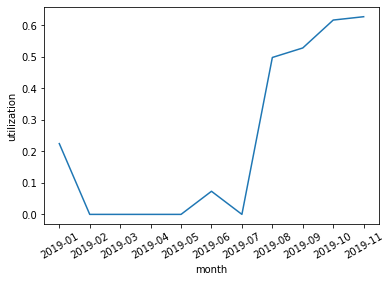

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

revolving_utilization_2019 = revolving_data_2019.groupby(['month'])[['utilization']].mean()
sns.lineplot(data=revolving_utilization_2019, x=revolving_utilization_2019.index, y=revolving_utilization_2019['utilization'])
plt.xlabel('reported month')
plt.tick_params(axis='x', rotation=30)

Reported information of 2019-01 indicates the utilization rate in the previous month, which is 2018-12. The utilization rate for the first quarter of 2019 is low. 
cash-back bonus

It has a significant increase in utilization rate from the third quarter, and the average utilization rate is greater than 50% from the third quarter to the fourth quarter. During 
We may need to pay attention to the 

In [ ]:
data_2019 = clean_revolving_data[clean_revolving_data['dateReported'].apply(helper_function)]
data_2019

,id,credit_report_id,tradeline_index,user_id,portfolioType,creditLimit,highCredit,currentBalance,terms_in_month,scheduledMonthlyPayment,dateOpened,dateReported,dateClosed,mostRecentPayment_date,dataPulled
0,1,5dbb7b2af50df923e06c9973,0,5dbb7b29f50df923e06c9970,revolving,400.0,257.0,150.0,MIN,8.0,2019-07-17,2019-10-12,NaT,2019-09-03,2019-11-01 00:24:10.245
32,33,5dbb7eb7f50df923e06c997a,0,5dbb7eb6f50df923e06c9977,revolving,4020.0,2416.0,2002.0,MIN,92.0,2013-05-16,2019-10-25,NaT,2019-10-22,2019-11-01 00:39:19.641
33,34,5dbb7eb7f50df923e06c997a,1,5dbb7eb6f50df923e06c9977,revolving,1800.0,1167.0,0.0,NaN,NaN,2009-05-16,2019-10-23,NaT,2015-10-05,2019-11-01 00:39:19.641
34,35,5dbb7eb7f50df923e06c997a,2,5dbb7eb6f50df923e06c9977,revolving,10000.0,8127.0,7013.0,NaN,NaN,2010-07-30,2019-10-23,NaT,2019-10-16,2019-11-01 00:39:19.641
35,36,5dbb7eb7f50df923e06c997a,3,5dbb7eb6f50df923e06c9977,revolving,1800.0,0.0,0.0,NaN,NaN,2018-08-12,2019-10-22,NaT,2018-08-12,2019-11-01 00:39:19.641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24813,24814,5de1a864e1c4624e16eb8985,7,5de1a863e1c4624e16eb8982,revolving,1500.0,1658.0,901.0,MIN,27.0,2011-09-21,2019-11-12,NaT,2019-11-08,2019-11-29 23:23:16.448
24814,24815,5de1a864e1c4624e16eb8985,8,5de1a863e1c4624e16eb8982,revolving,500.0,500.0,0.0,NaN,NaN,2019-07-26,2019-11-11,NaT,2019-08-30,2019-11-29 23:23:16.448
24815,24816,5de1a864e1c4624e16eb8985,9,5de1a863e1c4624e16eb8982,revolving,2000.0,2182.0,1691.0,MIN,54.0,2016-04-13,2019-11-08,NaT,2019-11-05,2019-11-29 23:23:16.448
24816,24817,5de1a864e1c4624e16eb8985,10,5de1a863e1c4624e16eb8982,revolving,2100.0,1325.0,918.0,MIN,30.0,2011-09-30,2019-11-06,NaT,2019-11-02,2019-11-29 23:23:16.448


In [ ]:
data_2019['utilization'] = data_2019['currentBalance'] / data_2019['creditLimit']
data_2019['month'] = data_2019['dateReported'].apply(convert_date_to_month)
data_2019.groupby(['month'])[['utilization']].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,utilization
month,
2019-01,0.224659
2019-02,0.000000
2019-03,0.000000
2019-04,0.000000
2019-05,0.000000
2019-06,0.073333
2019-07,0.000000
2019-08,0.498050
2019-09,0.528242


In [ ]:
lineOfCredit_data = data[data['portfolioType'] == 'lineOfCredit']
lineOfCredit_data

,id,credit_report_id,tradeline_index,user_id,portfolioType,creditLimit,highCredit,currentBalance,terms_in_month,scheduledMonthlyPayment,dateOpened,dateReported,dateClosed,mostRecentPayment_date,dataPulled
47,48,5dbb7eb7f50df923e06c997a,15,5dbb7eb6f50df923e06c9977,lineOfCredit,10000.0,9454.0,9087.0,MIN,293.0,1999-10-12,2019-09-30,NaT,2019-09-16,2019-11-01 00:39:19.641
59,60,5dbb7eb7f50df923e06c997a,27,5dbb7eb6f50df923e06c9977,lineOfCredit,54000.0,53838.0,0.0,NaN,NaN,2014-04-01,2018-01-18,2017-12-15,2017-12-15,2019-11-01 00:39:19.641
119,120,5dbc3d6ef50df923e06c9992,7,5dbc3d6df50df923e06c998f,lineOfCredit,20000.0,20746.0,17339.0,MIN,230.0,2007-08-24,2019-09-30,2009-09-15,2019-08-29,2019-11-01 14:13:02.222
181,182,5dbc4c9df50df923e06c99ab,0,5dbc4c56f50df923e06c99a9,lineOfCredit,1250.0,1451.0,0.0,NaN,NaN,2013-06-11,2016-02-29,2015-11-29,2015-09-29,2019-11-01 15:17:49.524
200,201,5dbc4c9df50df923e06c99ab,19,5dbc4c56f50df923e06c99a9,lineOfCredit,445.0,601.0,0.0,NaN,NaN,2016-04-29,2016-11-30,2016-10-06,2016-09-30,2019-11-01 15:17:49.524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24452,24453,5de147ade1c4624e16eb88fc,36,5de147ace1c4624e16eb88f9,lineOfCredit,1000.0,1000.0,0.0,NaN,NaN,2010-10-04,2015-11-30,2015-11-16,2015-09-25,2019-11-29 16:30:37.766
24644,24645,5de16bb6e1c4624e16eb8934,22,5de16bb5e1c4624e16eb8931,lineOfCredit,6300.0,6440.0,0.0,NaN,NaN,2013-12-12,2018-09-30,2018-06-15,2018-06-15,2019-11-29 19:04:22.674
24714,24715,5de1816de1c4624e16eb8958,0,5de1816ce1c4624e16eb8955,lineOfCredit,1500.0,1748.0,1741.0,NaN,NaN,2013-01-29,2016-02-29,2016-01-26,2015-11-13,2019-11-29 20:37:01.596
24717,24718,5de1816de1c4624e16eb8958,3,5de1816ce1c4624e16eb8955,lineOfCredit,300.0,300.0,257.0,MIN,25.0,2018-12-04,2019-11-04,NaT,2019-09-05,2019-11-29 20:37:01.596


In [ ]:
lineOfCredit_data['utilization'] = lineOfCredit_data['currentBalance'] / lineOfCredit_data['creditLimit']
lineOfCredit_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,credit_report_id,tradeline_index,user_id,portfolioType,creditLimit,highCredit,currentBalance,terms_in_month,scheduledMonthlyPayment,dateOpened,dateReported,dateClosed,mostRecentPayment_date,dataPulled,utilization
47,48,5dbb7eb7f50df923e06c997a,15,5dbb7eb6f50df923e06c9977,lineOfCredit,10000.0,9454.0,9087.0,MIN,293.0,1999-10-12,2019-09-30,NaT,2019-09-16,2019-11-01 00:39:19.641,0.908700
59,60,5dbb7eb7f50df923e06c997a,27,5dbb7eb6f50df923e06c9977,lineOfCredit,54000.0,53838.0,0.0,NaN,NaN,2014-04-01,2018-01-18,2017-12-15,2017-12-15,2019-11-01 00:39:19.641,0.000000
119,120,5dbc3d6ef50df923e06c9992,7,5dbc3d6df50df923e06c998f,lineOfCredit,20000.0,20746.0,17339.0,MIN,230.0,2007-08-24,2019-09-30,2009-09-15,2019-08-29,2019-11-01 14:13:02.222,0.866950
181,182,5dbc4c9df50df923e06c99ab,0,5dbc4c56f50df923e06c99a9,lineOfCredit,1250.0,1451.0,0.0,NaN,NaN,2013-06-11,2016-02-29,2015-11-29,2015-09-29,2019-11-01 15:17:49.524,0.000000
200,201,5dbc4c9df50df923e06c99ab,19,5dbc4c56f50df923e06c99a9,lineOfCredit,445.0,601.0,0.0,NaN,NaN,2016-04-29,2016-11-30,2016-10-06,2016-09-30,2019-11-01 15:17:49.524,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24452,24453,5de147ade1c4624e16eb88fc,36,5de147ace1c4624e16eb88f9,lineOfCredit,1000.0,1000.0,0.0,NaN,NaN,2010-10-04,2015-11-30,2015-11-16,2015-09-25,2019-11-29 16:30:37.766,0.000000
24644,24645,5de16bb6e1c4624e16eb8934,22,5de16bb5e1c4624e16eb8931,lineOfCredit,6300.0,6440.0,0.0,NaN,NaN,2013-12-12,2018-09-30,2018-06-15,2018-06-15,2019-11-29 19:04:22.674,0.000000
24714,24715,5de1816de1c4624e16eb8958,0,5de1816ce1c4624e16eb8955,lineOfCredit,1500.0,1748.0,1741.0,NaN,NaN,2013-01-29,2016-02-29,2016-01-26,2015-11-13,2019-11-29 20:37:01.596,1.160667
24717,24718,5de1816de1c4624e16eb8958,3,5de1816ce1c4624e16eb8955,lineOfCredit,300.0,300.0,257.0,MIN,25.0,2018-12-04,2019-11-04,NaT,2019-09-05,2019-11-29 20:37:01.596,0.856667


In [ ]:
lineOfCredit_data = lineOfCredit_data[lineOfCredit_data['dateClosed'].notnull()]
lineOfCredit_data

,id,credit_report_id,tradeline_index,user_id,portfolioType,creditLimit,highCredit,currentBalance,terms_in_month,scheduledMonthlyPayment,dateOpened,dateReported,dateClosed,mostRecentPayment_date,dataPulled,utilization,month
59,60,5dbb7eb7f50df923e06c997a,27,5dbb7eb6f50df923e06c9977,lineOfCredit,54000.0,53838.0,0.0,NaN,NaN,2014-04-01,2018-01-18,2017-12-15,2017-12-15,2019-11-01 00:39:19.641,0.000000,2018-01
119,120,5dbc3d6ef50df923e06c9992,7,5dbc3d6df50df923e06c998f,lineOfCredit,20000.0,20746.0,17339.0,MIN,230.0,2007-08-24,2019-09-30,2009-09-15,2019-08-29,2019-11-01 14:13:02.222,0.866950,2019-09
181,182,5dbc4c9df50df923e06c99ab,0,5dbc4c56f50df923e06c99a9,lineOfCredit,1250.0,1451.0,0.0,NaN,NaN,2013-06-11,2016-02-29,2015-11-29,2015-09-29,2019-11-01 15:17:49.524,0.000000,2016-02
200,201,5dbc4c9df50df923e06c99ab,19,5dbc4c56f50df923e06c99a9,lineOfCredit,445.0,601.0,0.0,NaN,NaN,2016-04-29,2016-11-30,2016-10-06,2016-09-30,2019-11-01 15:17:49.524,0.000000,2016-11
830,831,5dbc9f68bd7caa6ddf66d6a9,20,5dbc9f67bd7caa6ddf66d6a6,lineOfCredit,7500.0,7642.0,0.0,NaN,NaN,1996-04-01,2016-03-08,2012-03-09,2015-08-31,2019-11-01 21:11:04.386,0.000000,2016-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23878,23879,5ddee0d6e1c4624e16eb8857,34,5ddee0d5e1c4624e16eb8854,lineOfCredit,2500.0,0.0,0.0,NaN,NaN,2009-08-04,2012-03-30,2012-03-19,NaT,2019-11-27 20:47:18.750,0.000000,2012-03
24188,24189,5ddf0668e1c4624e16eb88bf,3,5ddf0666e1c4624e16eb88bc,lineOfCredit,70000.0,70150.0,0.0,NaN,NaN,2018-01-12,2019-11-07,2019-10-10,2019-10-02,2019-11-27 23:27:36.173,0.000000,2019-11
24452,24453,5de147ade1c4624e16eb88fc,36,5de147ace1c4624e16eb88f9,lineOfCredit,1000.0,1000.0,0.0,NaN,NaN,2010-10-04,2015-11-30,2015-11-16,2015-09-25,2019-11-29 16:30:37.766,0.000000,2015-11
24644,24645,5de16bb6e1c4624e16eb8934,22,5de16bb5e1c4624e16eb8931,lineOfCredit,6300.0,6440.0,0.0,NaN,NaN,2013-12-12,2018-09-30,2018-06-15,2018-06-15,2019-11-29 19:04:22.674,0.000000,2018-09


In [ ]:
lineOfCredit_data_2019 = lineOfCredit_data[lineOfCredit_data['dateReported'].apply(helper_function)]

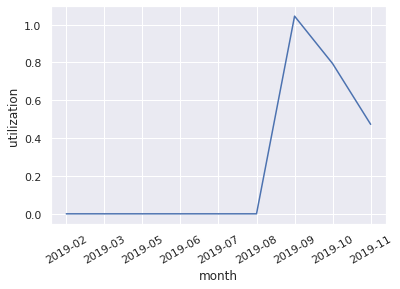

In [ ]:
lineOfCredit_utilization_data = lineOfCredit_data_2019.groupby(['month'])[['utilization']].mean()

# plt.figure(figsize=(15,3))
sns.lineplot(data=lineOfCredit_utilization_data, x=lineOfCredit_utilization_data.index, y=lineOfCredit_utilization_data['utilization'])
plt.tick_params(axis='x', rotation=30)
plt.show()